In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Dataset description

The dataset I have chosen is called "Internet Firewall Data" and is available on the UCI Machine Learning Repository website (https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data.). 

I have chosen this dataset due to its significance in the field of network security and intrusion detection. The dataset contains data from a firewall that was installed at a university network, and its purpose is to predict whether a connection attempt is normal or an attack.

The dataset comprises 12 features, which include a combination of categorical and numerical data and there are 65,532 instances in the dataset. The attributes are described as follows:

Source Port: This attribute represents the port number on the sending device or host that is used for the communication.

Destination Port: This attribute represents the port number on the receiving device or host that is used for the communication.

NAT Source Port: This attribute represents the Network Address Translation (NAT) source port number that is used for the communication.

NAT Destination Port: This attribute represents the Network Address Translation (NAT) destination port number that is used for the communication.

Action: This attribute represents the type of action taken on the communication, such as allow, drop, reset-both, or deny.
Allow - Allow the traffic.
Deny - Blocks traffic and enforces default Deny action,i.e., the request is denied.
Drop - Drops the traffic; does not send a reset request to the host.
Reset-Both - Sends a Reset request for both client and server-sides.


Bytes: This attribute represents the total number of bytes transferred during the communication.

Bytes Sent: This attribute represents the number of bytes sent from the source during the communication.

Bytes Received: This attribute represents the number of bytes received at the destination during the communication.

Packets: This attribute represents the total number of packets transferred during the communication.

Elapsed Time (sec): This attribute represents the duration of the communication in seconds.

pkts_sent: This attribute represents the number of packets sent from the source during the communication.

pkts_received: This attribute represents the number of packets received at the destination during the communication.

The website mentions that the dataset is from 2019, however the paper - "F. Ertam and M. Kaya, "Classification of firewall log files with multiclass support vector machine," 2018 6th International Symposium on Digital Forensic and Security (ISDFS), Antalya, Turkey, 2018" suggests that this dataset is from before 2018. Thus, the exact year of the dataset is not clear.

The data was gathered by deploying a firewall on a university network and monitoring the network traffic over a period of nine weeks. It is important to note that patterns of network attacks may have changed significantly since capturing this dataset, however, it still serves as a valuable resource for researchers and practitioners interested in network security and intrusion detection.

### Research question: What is the most effective machine learning algorithm for detecting network attacks in the Internet Firewall dataset, and how does its performance compare to other algorithms?

Here, I am predicting the "Action" attribute in the "Internet Firewall Data" dataset by developing a model that can classify network traffic into different categories based on their "Action" value.

The objective of this research question is to identify the most effective machine learning algorithm for detecting network attacks in the "Internet Firewall Data" dataset. To achieve this goal, the study would involve a comparison of the performance of decision-tree algorithm and different boosting techniques - such as feature selection, random forest, bagging - through the lens of supervised-learning classification modelling. These techniques will be evaluated through various performance metrics including accuracy, precision, recall, and F1-score.

### Why is Decision-Tree algorithm a good way of answering this research question?

3 reasons why decision tree is a good algorithm for this dataset:

1. <ins> Handles both categorical and continuous data:</ins> The "Internet Firewall Data" dataset contains both categorical and continuous attributes such as "Source Port", "Destination Port", "Bytes", and "Elapsed Time (sec)". Decision tree algorithms can handle both types of data, making it suitable for this dataset.

2. <ins> Interpretable and easy to understand:</ins> Decision trees produce a set of if-then rules that are easy to understand and interpret. This can help network administrators understand the decision-making process of the algorithm and identify potential vulnerabilities in their network.

3. <ins> Can model complex relationships:</ins> Decision trees can model complex relationships between the attributes and the class label, including non-linear and interaction effects. This makes it suitable for detecting subtle patterns in the data that might not be apparent through simple descriptive statistics.

##### Reading the data

In [2]:
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


##### Shape of the dataset

In [3]:
df.shape

(65532, 12)

##### Overview of the dataset:

In [4]:
df.describe(include='all')

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,allow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,37640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49391.969343,10577.385812,19282.972761,2671.049930,NaN,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,NaN,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,NaN,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,NaN,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,NaN,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,NaN,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000


##### NULL checck:

In [5]:
df.isnull().any()

Source Port             False
Destination Port        False
NAT Source Port         False
NAT Destination Port    False
Action                  False
Bytes                   False
Bytes Sent              False
Bytes Received          False
Packets                 False
Elapsed Time (sec)      False
pkts_sent               False
pkts_received           False
dtype: bool

No Data cleaning seems to be required since there are no NaN values

### Data preparation

Dropping columns - Source Port, Destination Port, NAT Source Port, and NAT Destination Port

In [6]:
df1 = df.drop(["Source Port", "Destination Port", "NAT Source Port", "NAT Destination Port"],axis=1)

##### New dataframe:

In [7]:
df1.head()

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,allow,177,94,83,2,30,1,1
1,allow,4768,1600,3168,19,17,10,9
2,allow,238,118,120,2,1199,1,1
3,allow,3327,1438,1889,15,17,8,7
4,allow,25358,6778,18580,31,16,13,18


##### Checking the values present in column - Action

In [8]:
df1["Action"].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

'allow', 'drop', 'deny', 'reset-both' will be the classification output/dependent variable

##### How many 'allow', 'drop', 'deny', 'reset-both' datas are present?

In [9]:
df1.groupby("Action").count()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Action,,,,,,,
allow,37640,37640,37640,37640,37640,37640,37640
deny,14987,14987,14987,14987,14987,14987,14987
drop,12851,12851,12851,12851,12851,12851,12851
reset-both,54,54,54,54,54,54,54


##### Prepraing X (independent) and Y (dependent) variables)

In [10]:
x = df1.drop(["Action"], axis=1)
print("x-columns:\n",x.columns)
y = df1["Action"]

x-columns:
 Index(['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets',
       'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')


##### Running the Decision Tree model:

In [11]:
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = dt_model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(x_test)

In [12]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7565
        deny       0.77      1.00      0.87      2945
        drop       0.99      0.67      0.80      2586
  reset-both       1.00      0.27      0.43        11

    accuracy                           0.93     13107
   macro avg       0.94      0.73      0.77     13107
weighted avg       0.95      0.93      0.93     13107

Accuracy: 93.27077134355687


array([[7563,    2,    0,    0],
       [   3, 2932,   10,    0],
       [   0,  859, 1727,    0],
       [   0,    8,    0,    3]], dtype=int64)

##### Evaluating the model:

###### Accuracy: 93.27%

(7563 + 2932 + 1727 + 3) / 13107 = 0.932

###### Precision:

1. Class "allow" = 1
2. Class "deny" = 0.77
3. Class "drop" = 0.99
4. Class "reset-both" = 1

Overall, these precision scores provide insight into the algorithm's ability to accurately classify instances within each class. 
However, while the algorithm correctly identified a majority of instances of "deny" class, it also produced a significant number of false positives.

###### Recall:

1. Class "allow" = 1.00
2. Class "deny" = 1.00
3. Class "drop" = 0.67
4. Class "reset-both" = 0.27

From the confusion matrix, it can be observed that the model has a perfect recall of 1 for Class "allow" and Class "deny", indicating that it was able to correctly identify all instances of these classes in the dataset. However, the recall for Class "drop" is only 0.67, suggesting that the model needs improvement in terms of correctly identifying instances of this class. The recall for Class "reset-both" is very low at 0.27, indicating that the model was not able to identify a significant number of instances of this class. Thus, there is room for improvement in the model's ability to correctly identify instances of these classes.

###### F-1 score:
1. Class "allow" = 1.00
2. Class "deny" = 0.87
3. Class "drop" = 0.80
4. Class "reset-both" = 0.43

The F-1 scores reveal the model's performance for each class. Class "allow" has a perfect F-1 score of 1, indicating that the model correctly identified all instances of this class without any false positives or negatives. For Class "deny", the F-1 score is 0.87, indicating some false positives or negatives. Class "drop" has an F-1 score of 0.80, indicating the model correctly identified most instances but missed some. Class "reset-both" has the lowest F-1 score of 0.43, indicating many false positives and negatives. Higher F-1 scores reflect better performance, while lower scores indicate that the model needs improvement for that class.

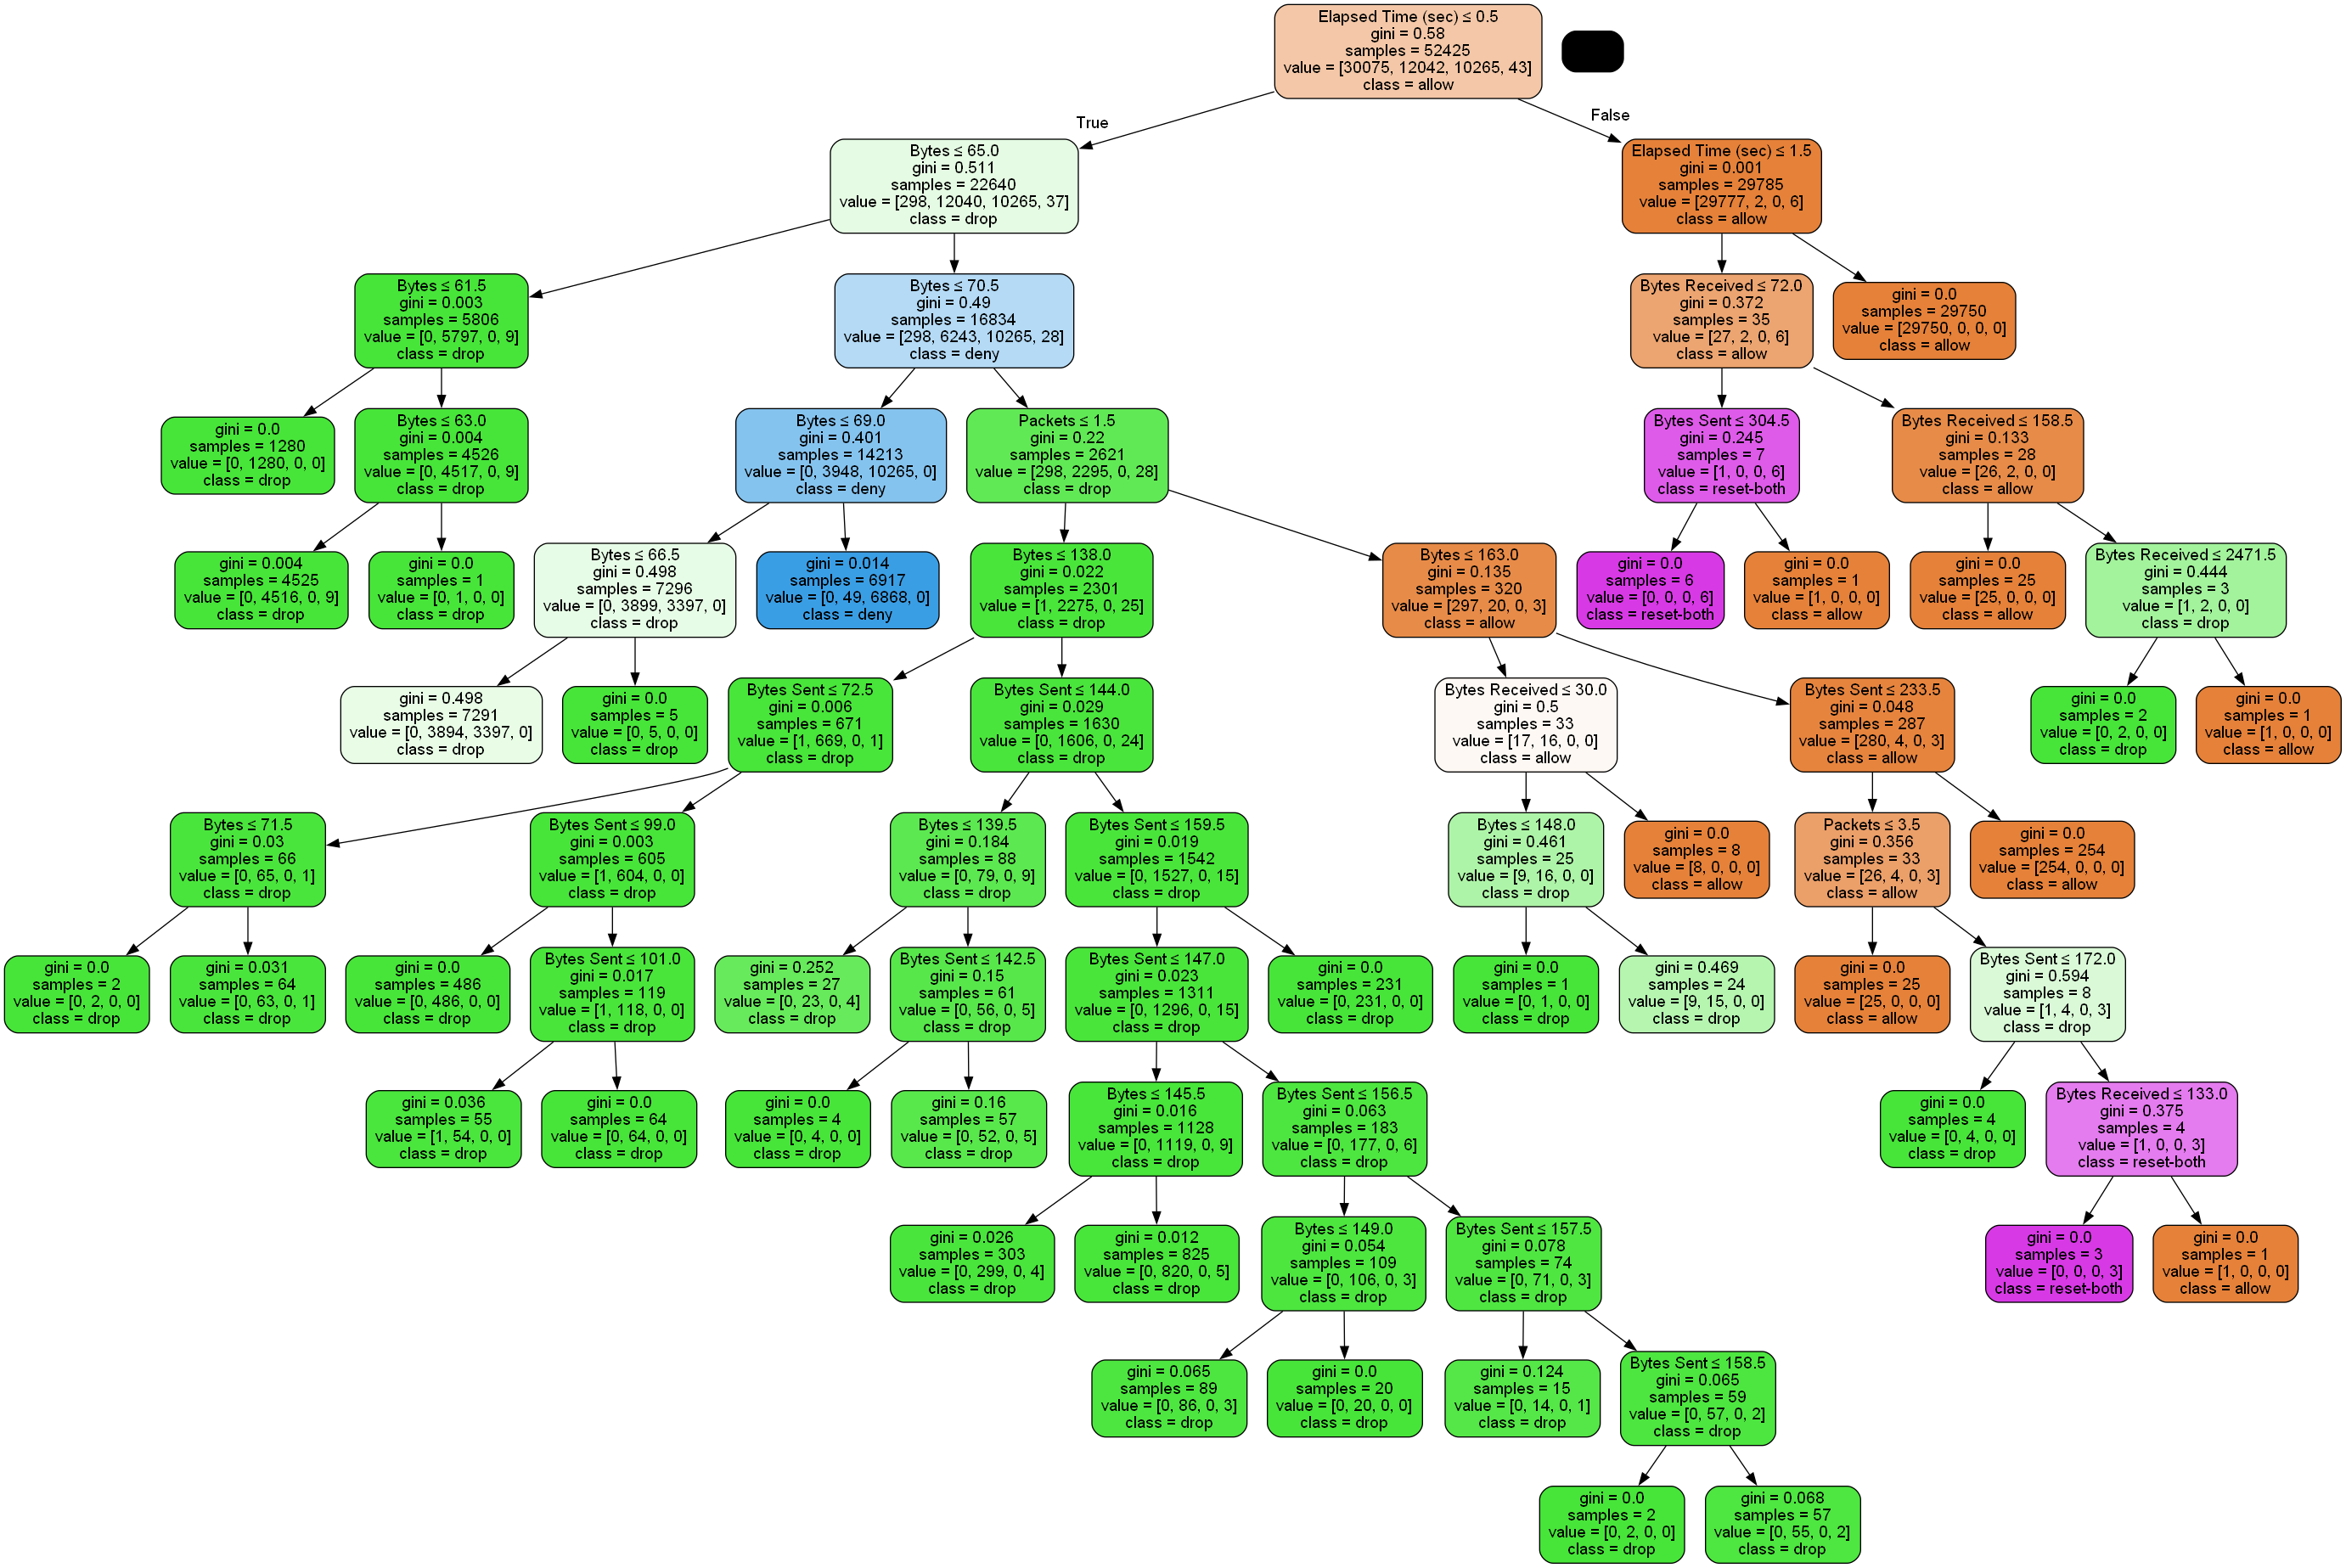

In [13]:
# Put your answer here
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = x.columns,class_names=['allow', 'drop', 'deny', 'reset-both'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('firewall.png')
Image(graph.create_png())

### 1. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

# creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
  
# metrics are used to find accuracy or error
  
# using metrics module for accuracy calculation
print(classification_report(y_test,y_pred))
print("Accuracy of the Model using Random Forest:", metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7565
        deny       0.77      1.00      0.87      2945
        drop       0.99      0.67      0.80      2586
  reset-both       1.00      0.27      0.43        11

    accuracy                           0.93     13107
   macro avg       0.94      0.73      0.77     13107
weighted avg       0.95      0.93      0.93     13107

Accuracy of the Model using Random Forest: 93.27840085450522


array([[7564,    1,    0,    0],
       [   3, 2932,   10,    0],
       [   0,  859, 1727,    0],
       [   0,    8,    0,    3]], dtype=int64)

##### Evaluating the model:

###### Accuracy: 93.28%

(7564 + 2932 + 1727 + 3) / 13107 = 0.9328

While the precision, recall, F-1 score remain the same as compared to Decision Tree, the accurracy increases slightly (by 0.01%). 

### 2. Feature selection

#### Feature correlation

<AxesSubplot:>

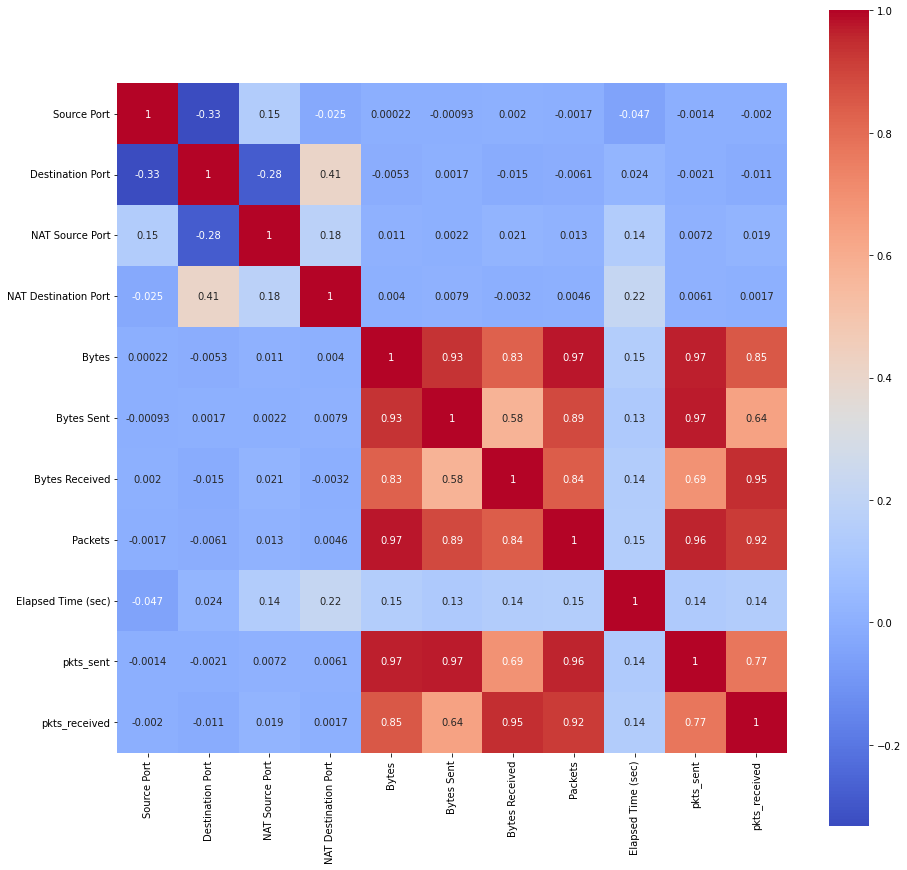

In [15]:
# df1 = df.drop(["Source Port", "Destination Port", "NAT Source Port", "NAT Destination Port"],axis=1)
# x = df1.drop(["Action"], axis=1)
features = df.drop(["Action"], axis=1)
Correlation=features.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(Correlation,square=True, annot=True, cmap='coolwarm')

#### Feature selection

Selecting all the columns from the initial dataset

In [16]:
features.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')

#### Modelling

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [18]:
# We need to evaluate our results. There are various metrics that can be used for this. 
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7431
        deny       0.99      1.00      1.00      3035
        drop       1.00      1.00      1.00      2631
  reset-both       0.75      0.60      0.67        10

    accuracy                           1.00     13107
   macro avg       0.94      0.90      0.92     13107
weighted avg       1.00      1.00      1.00     13107

Accuracy: 99.82452124818799


array([[7426,    5,    0,    0],
       [   1, 3029,    3,    2],
       [   0,    8, 2623,    0],
       [   0,    4,    0,    6]], dtype=int64)

##### Evaluating the model:

###### Accuracy - 99.82%

(7426 + 3029 + 2623 + 6) / 13107 = 0.99824

Using all the features in the dataset, the accuracy increases drastically by 6.5% (99.82%); indicates that the model is performing very well.

###### Precision:

1. Class "allow" = 1.00
2. Class "deny" = 0.99
3. Class "drop" = 1.00
4. Class "reset-both" = 0.86

The precision using feature selection increased for class "deny" and class "drop" to perfect scores. This means that this model makes very few false positive predictions, and is correctly identifying most of the positive instances for these two classes. However, the precision for class "reset-both" dropped by 14%, indicating that this model is making many false positive predictions with respect to class "reset-both",leading to incorrect decisions based on the predictions.

###### Recall:

1. Class "allow" = 1.00
2. Class "deny" = 1.00
3. Class "drop" = 1.00
4. Class "reset-both" = 0.60

In this case, for classes "allow", "deny", and "drop", the recall scores are perfect at 1.00. This indicates that the model was able to correctly identify all positive instances for these classes. However, for class "reset-both", the recall score is 0.60. This means that the model was only able to correctly identify 60% of the actual positive instances for this class, and missed identifying 40% of them. All in all, the recall for all classes increased using this model as compared to basic decision tree and random forest.

###### F-1 score:
1. Class "allow" = 1.00
2. Class "deny" = 1.00
3. Class "drop" = 1.00
4. Class "reset-both" = 0.71

Classes "allow", "deny", and "drop" have perfect precision and recall scores of 1.00. This means that the model was able to correctly identify all instances of these classes, with no false positives or false negatives. The performance of Class "reset-both" can be interpreted as moderately good, as indicated by the F-1 score of 0.71. While the precision of 0.86 suggests that when the model does identify a true positive, it is highly likely to be accurate, the recall of 0.60 indicates that the model misses a substantial proportion of true positives in this class. This means that there are likely many instances where the model fails to identify "reset-both" correctly, leading to a lower F-1 score; still doing better than basic decision tree and random forest algorithms.

### 3. Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
# Create a bagging classifier
bagging = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=5)

# Train the bagging classifier
bagging.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = bagging.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))
print("Accuracy of the Model using Random Forest:", metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7431
        deny       0.99      1.00      1.00      3035
        drop       1.00      1.00      1.00      2631
  reset-both       0.67      0.40      0.50        10

    accuracy                           1.00     13107
   macro avg       0.91      0.85      0.87     13107
weighted avg       1.00      1.00      1.00     13107

Accuracy of the Model using Random Forest: 99.7940032043946


array([[7424,    5,    0,    2],
       [   3, 3029,    3,    0],
       [   0,    8, 2623,    0],
       [   0,    6,    0,    4]], dtype=int64)

##### Evaluating the model:

###### Accuracy - 99.79%

(7424 + 3029 + 2623 + 4) / 13107 = 0.99794

Using all the features in the dataset, the accuracy increases drastically by ~6.5% (99.79%) compared to the basic decision tree; indicates that the model is performing very well.

###### Precision:

1. Class "allow" = 1.00
2. Class "deny" = 0.99
3. Class "drop" = 1.00
4. Class "reset-both" = 0.67

The precision using feature selection increased for class "deny" and class "drop" to perfect scores. This means that this model makes very few false positive predictions, and is correctly identifying most of the positive instances for these two classes. However, the precision for class "reset-both" dropped by 33%, indicating that this model is making many false positive predictions with respect to class "reset-both",leading to incorrect decisions based on the predictions.

###### Recall:

1. Class "allow" = 1.00
2. Class "deny" = 1.00
3. Class "drop" = 1.00
4. Class "reset-both" = 0.40

In this case, for classes "allow", "deny", and "drop", the recall scores are perfect at 1.00. This indicates that the model was able to correctly identify all positive instances for these classes. However, for class "reset-both", the recall score is 0.40. This means that the model was only able to correctly identify 40% of the actual positive instances for this class, and missed identifying 60% of them. All in all, the recall for all classes increased using this model as compared to basic decision tree and random forest.

###### F-1 score:
1. Class "allow" = 1.00
2. Class "deny" = 1.00
3. Class "drop" = 1.00
4. Class "reset-both" = 0.50

Classes "allow", "deny", and "drop" have perfect precision and recall scores of 1.00. This means that the model was able to correctly identify all instances of these classes, with no false positives or false negatives. The performance of Class "reset-both" can be interpreted as just average, as indicated by the F-1 score of 0.5. While the precision of 0.67 suggests that when the model does identify a true positive, it is highly likely to be accurate, the recall of 0.40 indicates that the model misses a substantial proportion of true positives in this class. This means that there are likely many instances where the model fails to identify "reset-both" correctly, leading to a lower F-1 score; still doing better than basic decision tree and random forest algorithms.

#### Visualizing different scores across different models:

##### Accuracy score

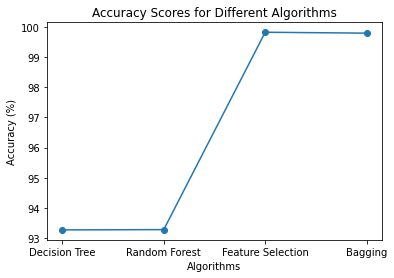

In [21]:
accuracy = [93.27, 93.28, 99.82, 99.79]
x_labels = ["Decision Tree", "Random Forest", "Feature Selection", "Bagging"]

plt.plot(x_labels, accuracy, marker='o')
plt.title('Accuracy Scores for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')

plt.show()

##### Precision score

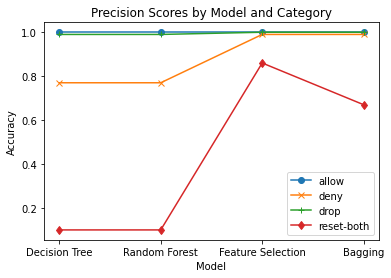

In [22]:
dt_scores = [1, 0.77, 0.99, 0.1]
rf_scores = [1, 0.77, 0.99, 0.1]
fs_scores = [1, 0.99, 1, 0.86]
bg_scores = [1, 0.99, 1, 0.67]

# create x-axis labels
x_labels = ["Decision Tree", "Random Forest", "Feature Selection", "Bagging"]

# create y-axis data for each category
allow_scores = [dt_scores[0], rf_scores[0], fs_scores[0], bg_scores[0]]
deny_scores = [dt_scores[1], rf_scores[1], fs_scores[1], bg_scores[1]]
drop_scores = [dt_scores[2], rf_scores[2], fs_scores[2], bg_scores[2]]
reset_scores = [dt_scores[3], rf_scores[3], fs_scores[3], bg_scores[3]]

# create line chart
plt.plot(x_labels, allow_scores, label="allow", marker='o')
plt.plot(x_labels, deny_scores, label="deny", marker='x')
plt.plot(x_labels, drop_scores, label="drop", marker='+')
plt.plot(x_labels, reset_scores, label="reset-both",marker='d')

# add legend, title, and axis labels
plt.legend()
plt.title("Precision Scores by Model and Category")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# display the chart
plt.show()

##### Recall score

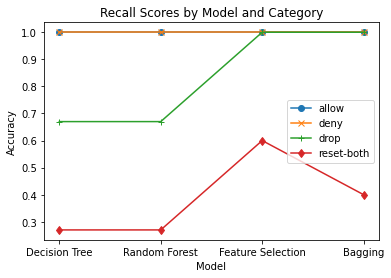

In [23]:
dt_scores = [1, 1, 0.67, 0.27]
rf_scores = [1, 1, 0.67, 0.27]
fs_scores = [1, 1, 1, 0.6]
bg_scores = [1, 1, 1, 0.4]

# create x-axis labels
x_labels = ["Decision Tree", "Random Forest", "Feature Selection", "Bagging"]

# create y-axis data for each category
allow_scores = [dt_scores[0], rf_scores[0], fs_scores[0], bg_scores[0]]
deny_scores = [dt_scores[1], rf_scores[1], fs_scores[1], bg_scores[1]]
drop_scores = [dt_scores[2], rf_scores[2], fs_scores[2], bg_scores[2]]
reset_scores = [dt_scores[3], rf_scores[3], fs_scores[3], bg_scores[3]]

# create line chart
plt.plot(x_labels, allow_scores, label="allow", marker='o')
plt.plot(x_labels, deny_scores, label="deny", marker='x')
plt.plot(x_labels, drop_scores, label="drop", marker='+')
plt.plot(x_labels, reset_scores, label="reset-both",marker='d')

# add legend, title, and axis labels
plt.legend()
plt.title("Recall Scores by Model and Category")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# display the chart
plt.show()

##### F-1 score

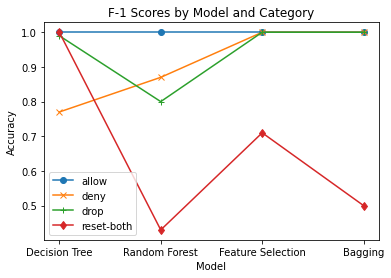

In [24]:
dt_scores = [1, 0.77, 0.99, 1]
rf_scores = [1, 0.87, 0.8, 0.43]
fs_scores = [1, 1, 1, 0.71]
bg_scores = [1, 1, 1, 0.5]

# create x-axis labels
x_labels = ["Decision Tree", "Random Forest", "Feature Selection", "Bagging"]

# create y-axis data for each category
allow_scores = [dt_scores[0], rf_scores[0], fs_scores[0], bg_scores[0]]
deny_scores = [dt_scores[1], rf_scores[1], fs_scores[1], bg_scores[1]]
drop_scores = [dt_scores[2], rf_scores[2], fs_scores[2], bg_scores[2]]
reset_scores = [dt_scores[3], rf_scores[3], fs_scores[3], bg_scores[3]]

# create line chart
plt.plot(x_labels, allow_scores, label="allow", marker='o')
plt.plot(x_labels, deny_scores, label="deny", marker='x')
plt.plot(x_labels, drop_scores, label="drop", marker='+')
plt.plot(x_labels, reset_scores, label="reset-both",marker='d')

# add legend, title, and axis labels
plt.legend()
plt.title("F-1 Scores by Model and Category")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# display the chart
plt.show()

All the visualizations above show different performance scores of 4 categories across different models.

#### Challenges faced:

One of the challenges observed in this dataset is that it was unbalanced,i.e., the number of instances belonging to one class is significantly higher or lower than the number of instances belonging to another class in the dataset. Thus, unbalanced dataset leads to biased model performance. As a result, the model was biased towards the majority class and did not do so good working on the minority class. 

#### Overcoming the challenge of unbalanced dataset

There are several techniques to overcome an unbalanced dataset, some of which are:
1. <ins>Resampling:</ins> This involves either oversampling the minority class or undersampling the majority class to balance the dataset. This can be achieved using techniques like Random Oversampling, Random Undersampling, etc.
2. <ins>Ensemble methods:</ins> Ensemble methods like bagging, boosting, and stacking can be used to combine multiple models to improve the overall performance of the model. This helps in reducing the impact of the minority class on the overall accuracy.
3. <ins>Cost-sensitive learning:</ins> Cost-sensitive learning involves assigning different costs to misclassifying different classes. This helps in reducing the impact of the majority class and improves the performance of the model on the minority class.

#### Potential benefits and harms of the model:
##### Benefits
1. <ins>User-Friendly:</ins> Decision trees are easy to interpret and understand, which can make them a useful tool for network administrators who may not have a deep understanding of machine learning algorithms.
2. <ins>Customization:</ins> Decision tree models can be customized to fit the specific needs of an organization, such as identifying specific types of threats or prioritizing certain types of traffic.
3. <ins>Time Efficiency:</ins> Decision trees are relatively fast to build and execute, which can help network administrators to quickly identify and respond to threats.

##### Harms
1. <ins>Maintenance:</ins> Maintaining a decision tree model built for the Internet Firewall dataset may require ongoing efforts and resources. As the network infrastructure and firewall rules change over time, the decision tree model may become outdated and less effective. It may be necessary to periodically retrain the model on new data or adjust the model parameters to reflect the current network environment. This maintenance can be time-consuming and may require technical expertise. Additionally, if the model is used in a production environment, any changes to the model or its parameters may require careful testing and validation to ensure that they do not introduce errors or security vulnerabilities.
2. <ins>Lack of context:</ins> The lack of contextual information is a potential harm when using the Decision Tree model built for the Internet Firewall dataset. The dataset does not provide detailed information about the specific network environment where the firewall was deployed, such as the types of applications and services running on the network, the users accessing the network, and the security policies in place. This lack of contextual information could lead to incorrect assumptions being made about the behavior of network traffic, resulting in inaccurate or incomplete models. Furthermore, the lack of contextual information could make it difficult to apply the model to other network environments, as the behavior of network traffic can vary widely depending on the specific context.
3. <ins>False alarms:</ins> False alarms in the internet firewall dataset refer to the instances where the model predicts that a network traffic is malicious, while in reality it is not. These false alarms can be harmful in the sense that legitimate traffic might be blocked, leading to a decrease in network performance, or important data might be prevented from being transmitted. Additionally, false alarms might create a negative user experience and result in unnecessary workload for the system administrators who need to investigate and resolve the issue. 

#### Research question for future work: 
Can the accuracy of firewall classification be improved by incorporating data from additional sources (such as geographical information, etc.)?